In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
#df=pd.read_hdf("nsfg.hdf5","nsfg")
#print(df.head())

7.466407580919932 5.337450312322543
   bwt  gestation  parity  age  height  weight  smoke  bwt_lbs  height_ft  \
0  120        284       0   27      62     100      0   7.5000   5.166667   
1  113        282       0   33      64     135      0   7.0625   5.333333   
2  128        279       0   28      64     115      1   8.0000   5.333333   
3  108        282       0   23      67     125      1   6.7500   5.583333   
4  136        286       0   25      62      93      0   8.5000   5.166667   

   gestation_wks  PreTerm  
0      40.571429        0  
1      40.285714        0  
2      39.857143        0  
3      40.285714        0  
4      40.857143        0  


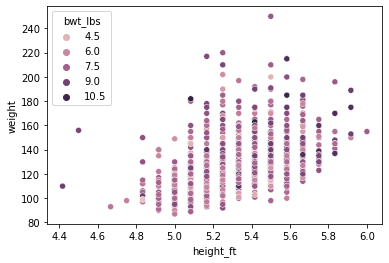

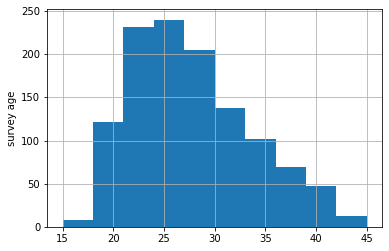

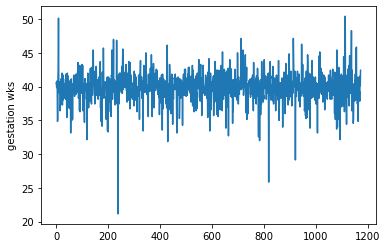

In [64]:
df=pd.read_csv("baby_birth_weight.csv")
df["bwt_lbs"]=df["bwt"]/16
avg=df["bwt_lbs"].mean()
df["height_ft"]=df["height"]/12
df["gestation_wks"]=df["gestation"]/7

df["PreTerm"]=df["gestation_wks"].apply(lambda x: True if x<37 else False)
height=df["height_ft"].mean()
print(avg,height)

encoder=LabelEncoder()
df['PreTerm']=encoder.fit_transform(df['PreTerm'])
print(df.head())
#df["height_ft"].plot()
sns.scatterplot(x="height_ft",y="weight",data=df,hue="bwt_lbs")
plt.show()

df["age"].hist()
plt.ylabel("survey age")
plt.show()
df["gestation_wks"].plot()
plt.ylabel("gestation wks")
plt.show()





3.4375     1
3.6250     1
3.8750     1
3.9375     1
4.0625     2
          ..
10.5625    1
10.6250    1
10.8125    1
10.8750    3
11.0000    1
Name: bwt_lbs, Length: 107, dtype: int64


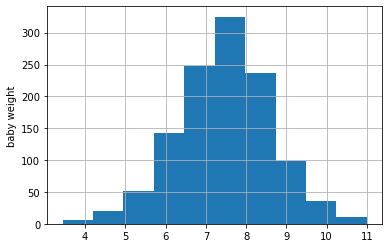

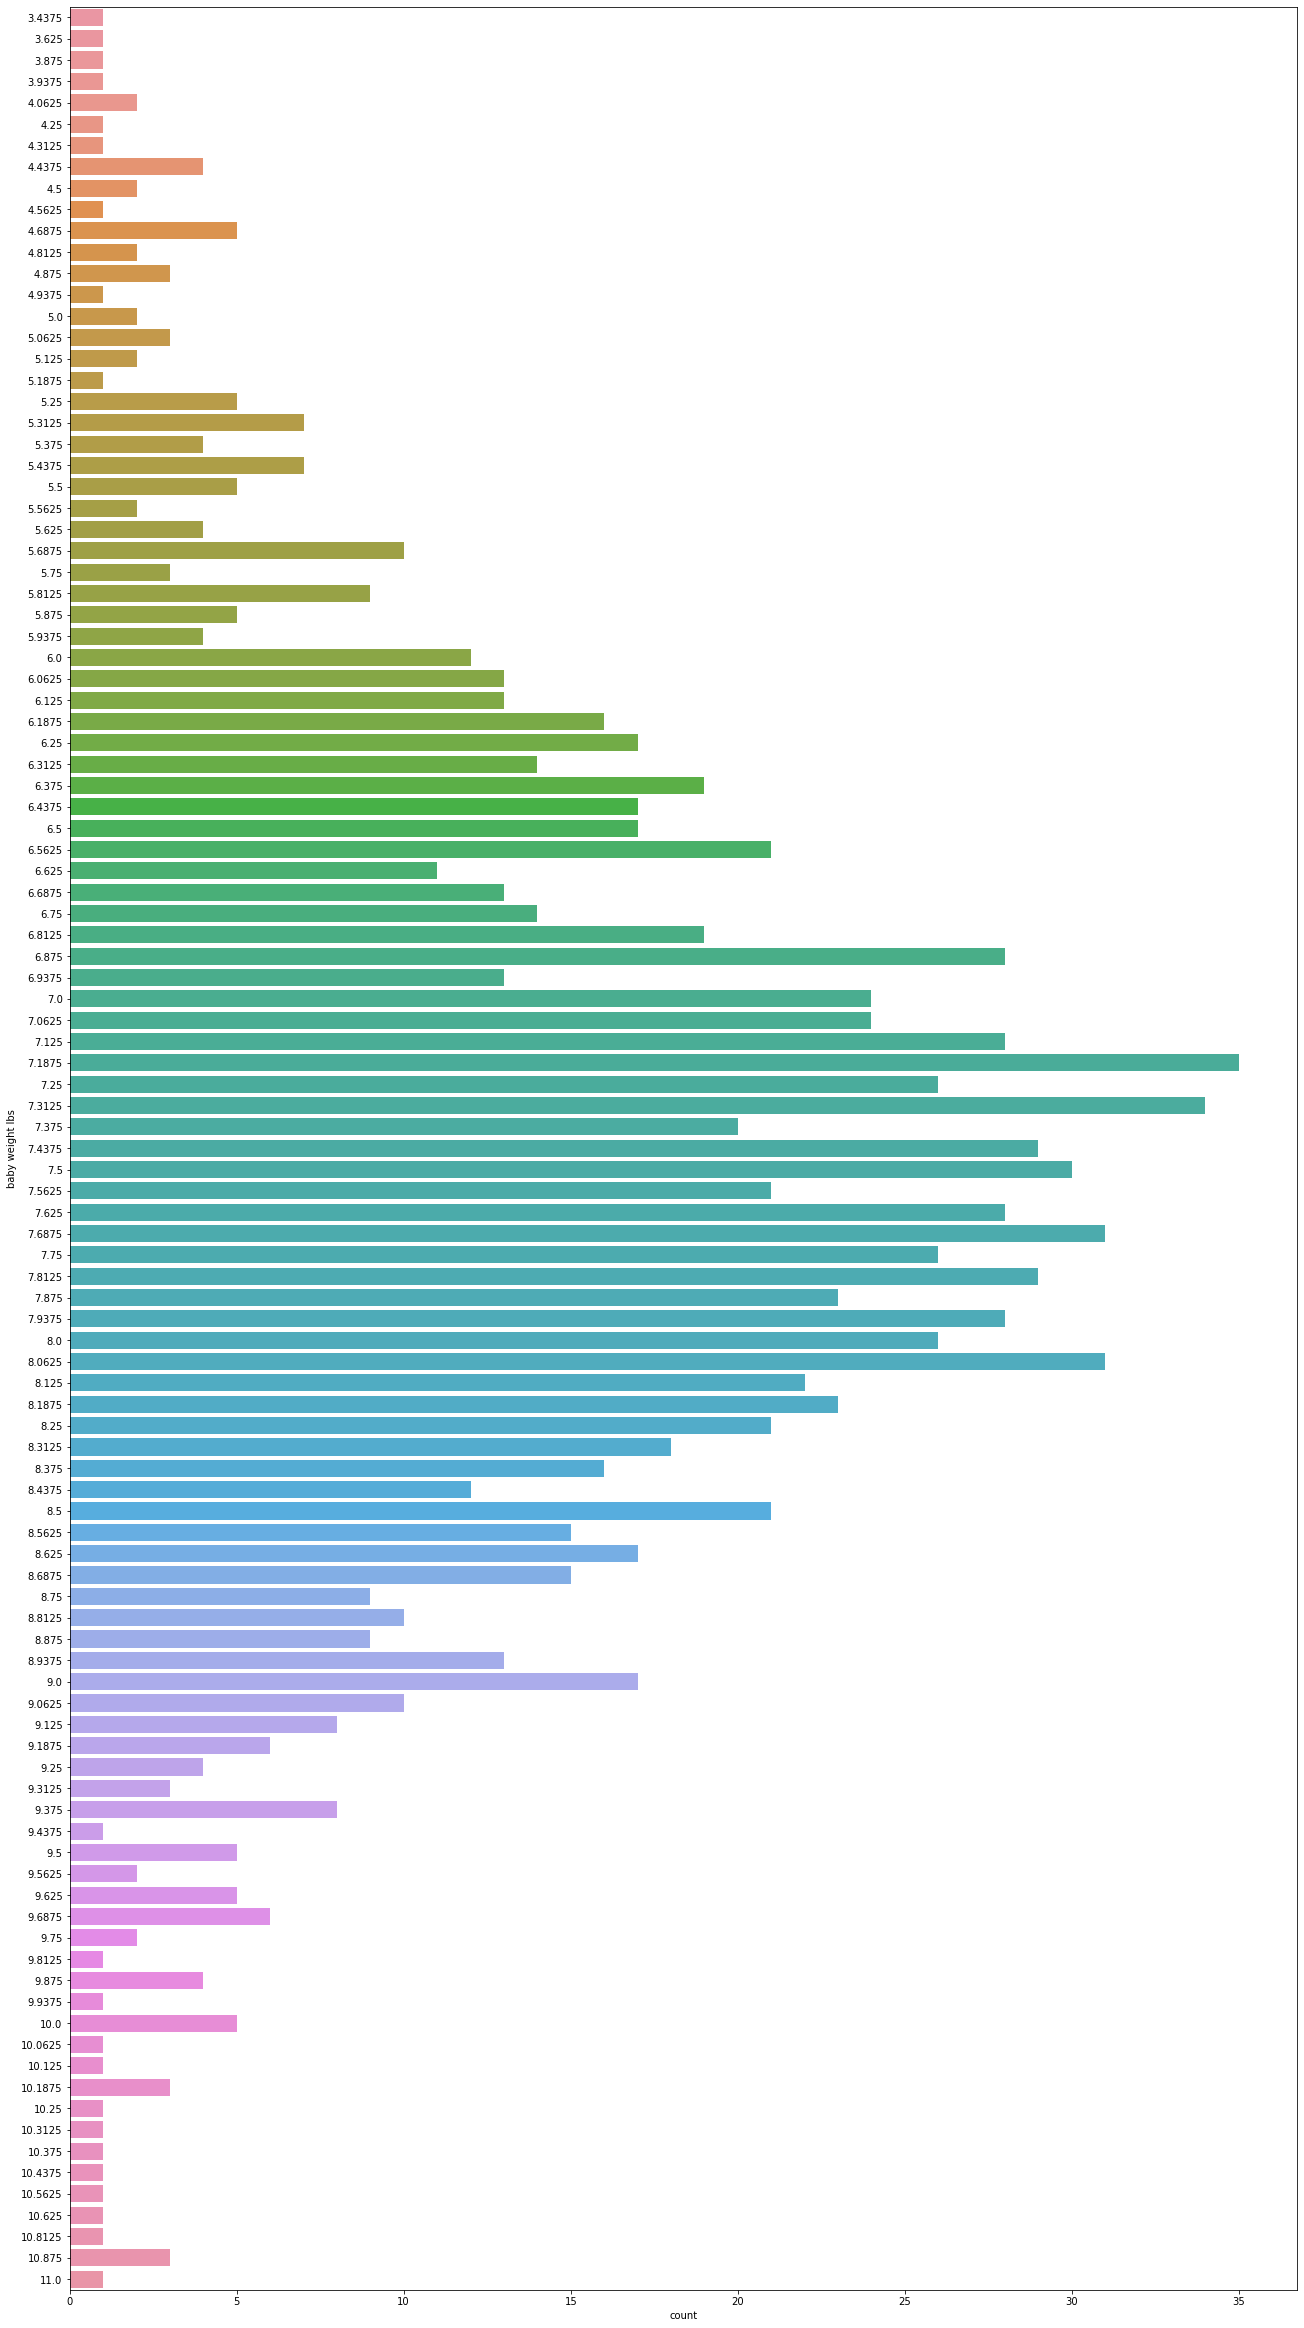

In [4]:
pounds=df["bwt_lbs"]
print(pounds.value_counts().sort_index())

pounds.hist()
plt.ylabel("baby weight")

plt.figure(figsize=(22,42))
sns.countplot(data=df, y="bwt_lbs")
plt.ylabel("baby weight lbs")
plt.show()

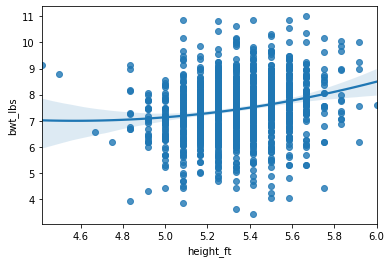

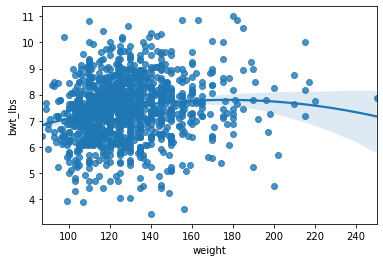

In [5]:
sns.regplot(data=df, y='bwt_lbs', x="height_ft", order=2)
plt.show()

sns.regplot(data=df, y='bwt_lbs', x="weight", order=2)
plt.show()


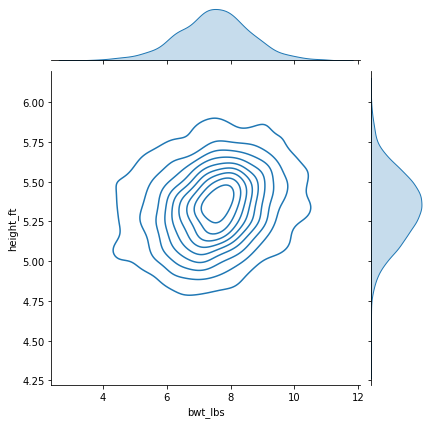

In [18]:
g=sns.JointGrid(data=df, x='bwt_lbs', y='height_ft')
g=g.plot_joint(sns.kdeplot)
g=g.plot_marginals(sns.kdeplot, shade=True)
#g=g.annotate(stats.pearson_r)

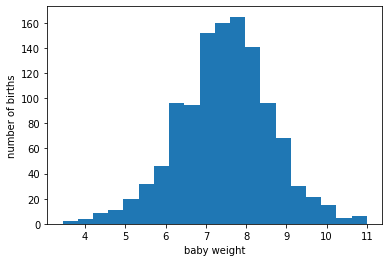

In [19]:
pounds=df["bwt_lbs"]

plt.hist(pounds.dropna(),bins=20)
plt.xlabel("baby weight")
plt.ylabel("number of births")
plt.show()


In [20]:
preterm = df["PreTerm"]

print("Count of PreTerm babies ", preterm.sum())
print("Percent of PreTerm babies ", df["PreTerm"].mean())

Count of PreTerm babies  96
Percent of PreTerm babies  0.0817717206132879


In [21]:
preterm_weight=pounds[preterm].mean()
print("Average PreTerm baby weight ", preterm_weight)

Average PreTerm baby weight  6.248697916666667


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


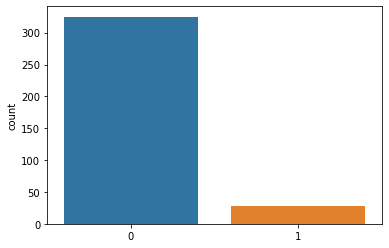

[[ -0.21894439   0.50191679 -11.24653331]]
[-14.571159]
Coefficients close to zero will contribute little to the end result
Number of errors: 2
Loss: 1


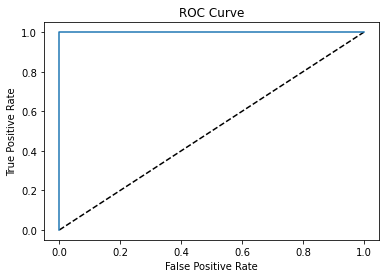

Model Accuracy=99.88
[[324   0]
 [  1  28]]


In [121]:
pipeline = Pipeline([('lr', LogisticRegression(penalty='l2',C=10))])

scaler=StandardScaler()
#X=np.array(df['gestation_wks']).reshape(-1,1)
X=scaler.fit_transform(df[['bwt_lbs','height_ft','gestation_wks']])
y=np.array(df['PreTerm'])

X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

pipeline.fit(X_train,y_train)

y_pred_prob=pipeline.predict_proba(X_test)

predictions=pipeline.predict(X_test)
print(predictions)

sns.countplot(x=predictions, orient='h')
plt.show()
#print(predictions[:,0])

print(pipeline['lr'].coef_)
print(pipeline['lr'].intercept_)

print('Coefficients close to zero will contribute little to the end result')

num_err = np.sum(y != pipeline.predict(X))
print("Number of errors:", num_err)

inds_ascending = np.argsort(pipeline['lr'].coef_.flatten()) 


def my_loss(y,w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

print("Loss:",my_loss(y_test,predictions))

fpr, tpr, threshholds = roc_curve(y_test,y_pred_prob[:,1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

accuracy=round(pipeline['lr'].score(X_train, y_train) * 100, 2)

print("Model Accuracy={accuracy}".format(accuracy=accuracy))

cm=confusion_matrix(y_test,predictions)
print(cm)


